___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from pprint import pprint 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score,roc_curve, auc
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score
import shap
import warnings
from xgboost import XGBClassifier
warnings.filterwarnings('ignore') 
sns.set_style('whitegrid')
pd.set_option('display.max_rows', None)

%matplotlib inline

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df1 = pd.read_csv('ANSUR II MALE Public.csv', encoding = 'Latin-1')

In [3]:
df2 = pd.read_csv('ANSUR II FEMALE Public.csv', encoding = 'Latin-1')

In [5]:
# check if they have the same columns
set(df1.columns) == set(df2.columns)

False

In [6]:
# print uncommon items
set(df1.columns) ^ (set(df2.columns))

{'SubjectId', 'subjectid'}

In [19]:
df1.rename(columns={'subjectid': 'SubjectId'}, inplace=True)

In [8]:
set(df1.columns) == set(df2.columns)

True

In [83]:
df = pd.concat([df1, df2], axis = 0)

In [10]:
df.sample(2)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
3194,27595,227,1476,343,215,1361,250,206,443,365,...,Combat Service Support,35D,Nebraska,1,NaN,1,24,72,184,Right hand
783,18360,270,1415,332,267,1310,223,172,372,348,...,Combat Support,27D,Russia,1,NaN,1,33,68,180,Left hand


## Schema

In [9]:
schema = pd.read_csv('ANSUR II Databases Overview.csv')
schema.head()

,feature,description,type
0,SubjectId,A unique number for each participant measured ...,Demographic data
1,SubjectBirthLocation,Subject Birth Location; a U.S. state or foreig...,Demographic data
2,SubjectNumericRace,Subject Numeric Race; a single or multi-digit ...,Demographic data
3,Ethnicity,self-reported ethnicity (verified through inte...,Demographic data
4,DODRace,Department of Defense Race; a single digit ind...,Demographic data


In [10]:
schema['feature'] = schema['feature'].str.strip()

In [11]:
def mapping(feature):
    '''
    Description:
    This function gets a column and map back its original description.
    
    INPUT:
    feature - (str) column name as a string
    
    OUTPUT:
    desc - (str) full description
    '''
    desc = list(schema[schema['feature'] == feature]['description'])
    return desc

In [14]:
pprint(mapping('DODRace'))

['Department of Defense Race; a single digit indicating a subject’s '
 'self-reported preferred single race where selecting multiple races is not an '
 'option. This variable is intended to be comparable to the Defense Manpower '
 'Data Center demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = '
 'Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other']


## Dropping columns with too many nulls

In [15]:
cols = set(df.columns)

In [84]:
#to handle missing values drop any columns that exceeds the threshold value

threshold = 0.5 # 50%
df = df.loc[:, df.isna().mean().lt(threshold)]

In [17]:
# show dropped columns
dropped = cols ^ set(df.columns)
list(dropped)

['Ethnicity']

## Dropping redundant/irrelevant features

In [18]:
schema

,feature,description,type
0,SubjectId,A unique number for each participant measured ...,Demographic data
1,SubjectBirthLocation,Subject Birth Location; a U.S. state or foreig...,Demographic data
2,SubjectNumericRace,Subject Numeric Race; a single or multi-digit ...,Demographic data
3,Ethnicity,self-reported ethnicity (verified through inte...,Demographic data
4,DODRace,Department of Defense Race; a single digit ind...,Demographic data
5,Gender,“Male” or “Female”,Demographic data
6,Age,Participant’s age in years,Demographic data
7,Heightin,"Height in Inches; self-reported, comparable to...",Demographic data
8,Weightlbs,"Weight in Pounds; self-reported, comparable to...",Demographic data
9,WritingPreference,"Writing Preference; “Right hand”, “Left hand”,...",Demographic data


In [23]:
df['SubjectsBirthLocation'].value_counts()

California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Arizona                      84
Missouri                     84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas                       63
South Da

In [17]:
mapping('SubjectNumericRace')

['Subject Numeric Race; a single or multi-digit code indicating a subject’s self-reported race or races (verified through interview). Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other']

In [19]:
mapping('Weightlbs')

['Weight in Pounds; self-reported, comparable to measured “weightkg”']

In [20]:
mapping('Heightin')

['Height in Inches; self-reported, comparable to measured “stature”']

In [21]:
mapping('PrimaryMOS')

['Primary Military Occupational Specialty']

In [312]:
features_to_drop = [
    'SubjectId', # irrelavant
    #'SubjectsBirthLocation', 
    'SubjectNumericRace', # redundant
    'Heightin', # redundant
    'Weightlbs',  # redundant
    'Date',  # irrelavant
    'Installation',  # irrelavant
    'PrimaryMOS', # irrelavant
    # 'WritingPreference', # there are some studies about its association with race?
    ]

In [86]:
df = df.drop(features_to_drop, axis=1)

In [87]:
counts = df['SubjectsBirthLocation'].value_counts()

values_to_drop = counts[counts <= 50]

mask = df['SubjectsBirthLocation'].isin(values_to_drop.index)

# keep the rows where the mask is False
df = df[~mask]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  6068 non-null   int64 
 1   acromialheight                  6068 non-null   int64 
 2   acromionradialelength           6068 non-null   int64 
 3   anklecircumference              6068 non-null   int64 
 4   axillaheight                    6068 non-null   int64 
 5   balloffootcircumference         6068 non-null   int64 
 6   balloffootlength                6068 non-null   int64 
 7   biacromialbreadth               6068 non-null   int64 
 8   bicepscircumferenceflexed       6068 non-null   int64 
 9   bicristalbreadth                6068 non-null   int64 
 10  bideltoidbreadth                6068 non-null   int64 
 11  bimalleolarbreadth              6068 non-null   int64 
 12  bitragionchinarc                6068 non-null   

## Explore Data

In [15]:
# checking for null values
df.isnull().sum().any()

False

In [16]:
# checking for duplicates
df.duplicated().sum()

0

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0
bicristalbreadth,6068.0,274.735003,19.221034,197.0,262.00,274.0,288.00,362.0


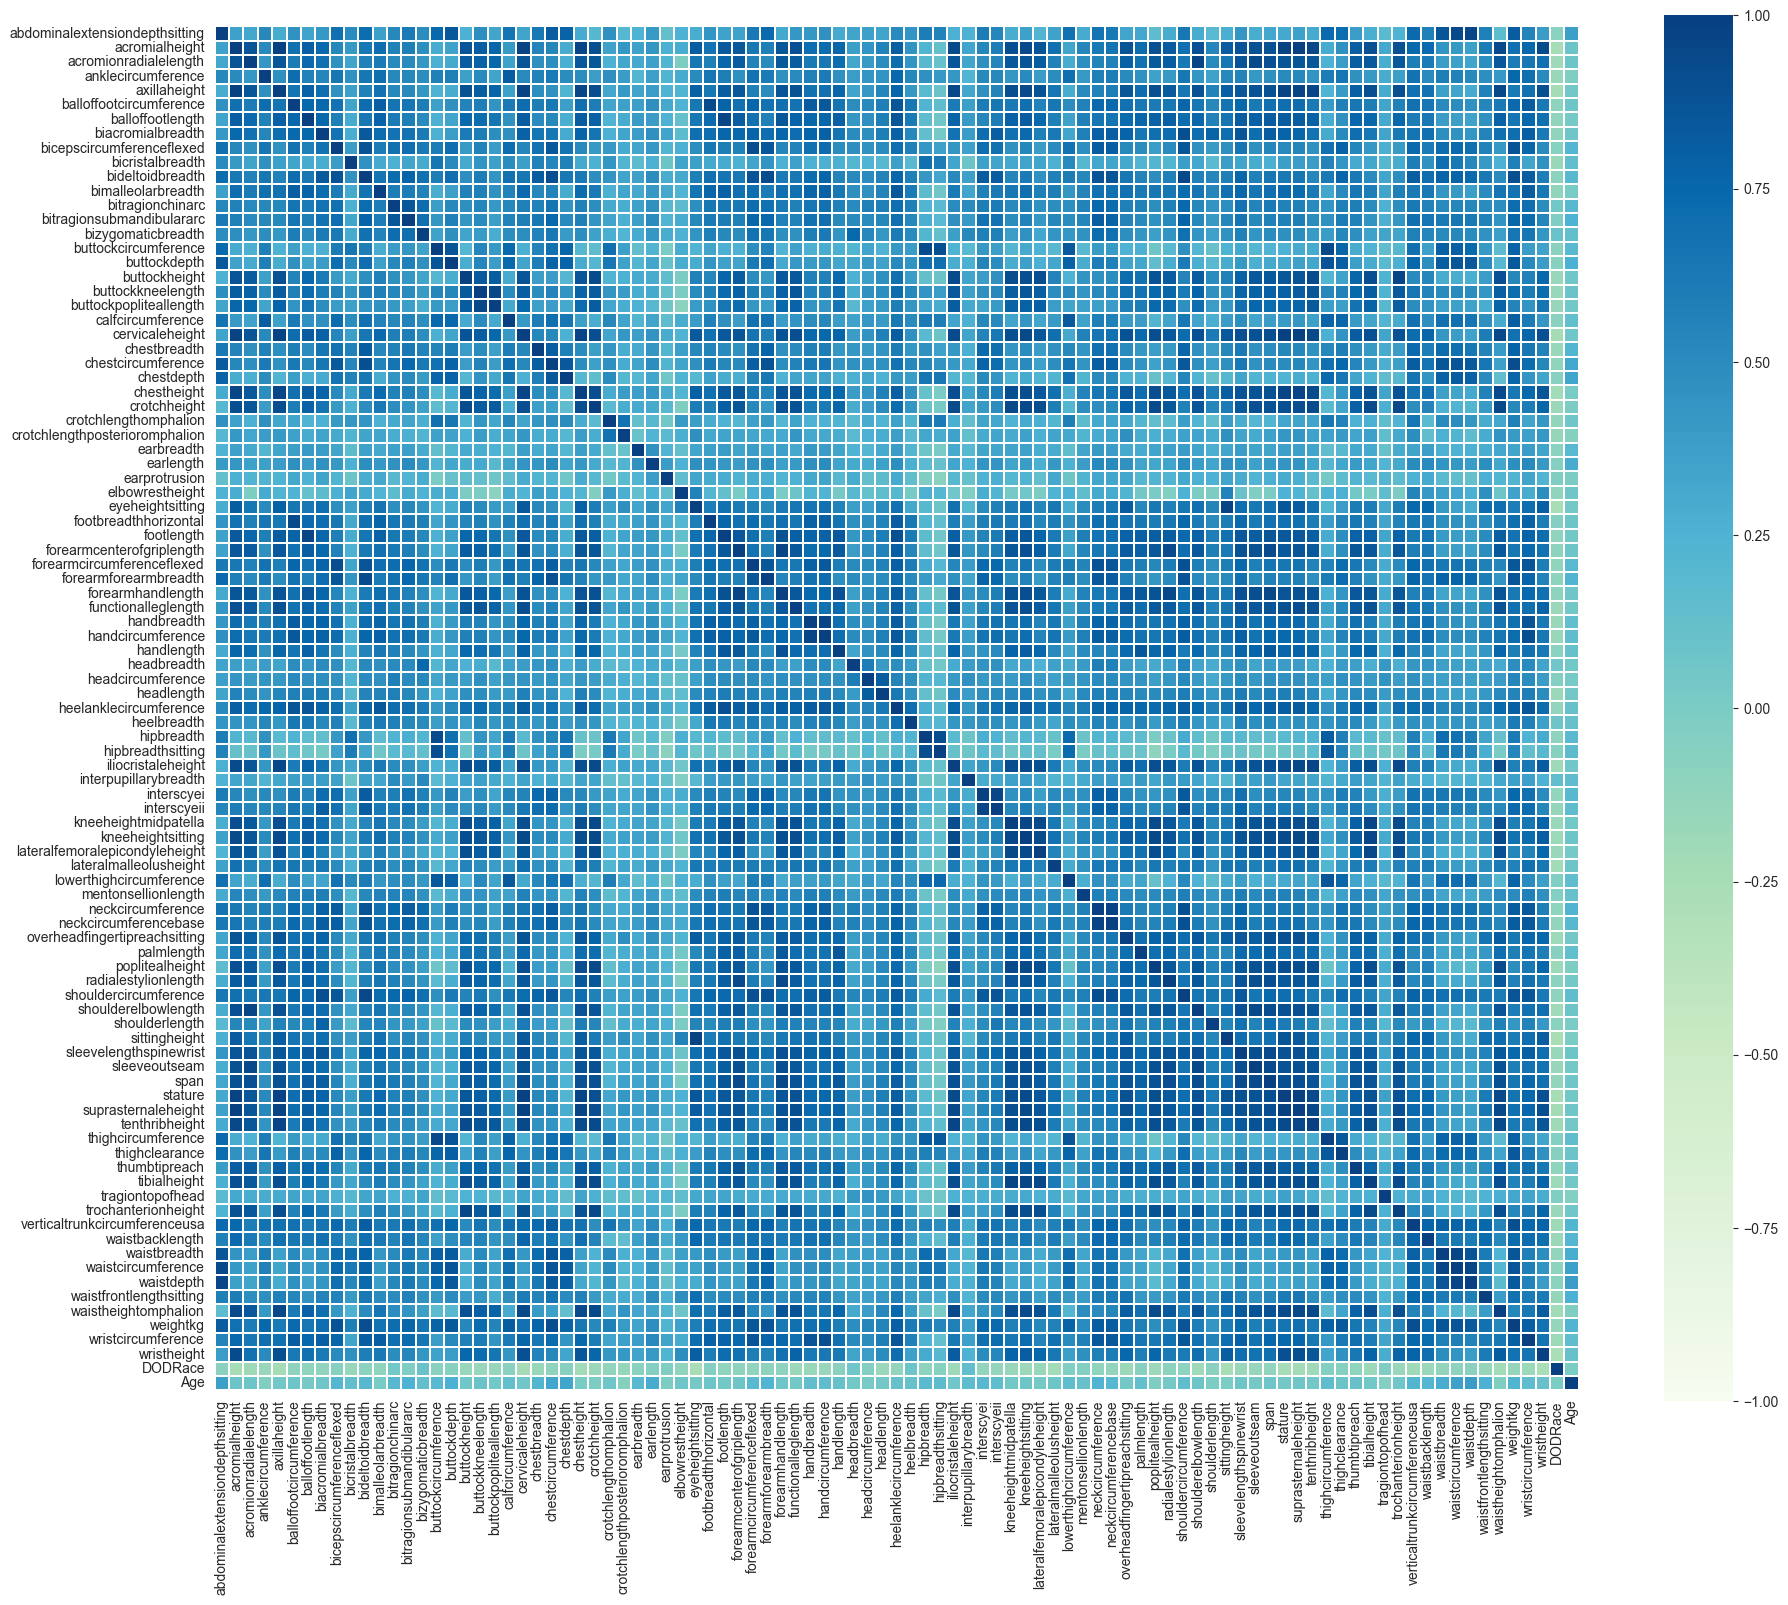

In [17]:
plt.figure(figsize=(22, 18))
sns.heatmap(df.corr(numeric_only=True), 
            vmin=-1,
            vmax= 1,
            cmap= 'GnBu', 
            linewidths=.12, 
            linecolor='white',
            fmt='.2g',
            square=True);

It's hard to visualuze the correlation since we have too many features

In [29]:
# show correlated features with 0.9 correlation scores
correlations = df.corr(numeric_only=True).unstack().sort_values()
highest_corr = correlations[correlations > 0.9]
highest_corr

chestheight                     kneeheightmidpatella              0.900121
kneeheightmidpatella            chestheight                       0.900121
hipbreadthsitting               buttockcircumference              0.900228
buttockcircumference            hipbreadthsitting                 0.900228
poplitealheight                 stature                           0.900976
stature                         poplitealheight                   0.900976
shouldercircumference           biacromialbreadth                 0.901051
biacromialbreadth               shouldercircumference             0.901051
poplitealheight                 suprasternaleheight               0.901304
suprasternaleheight             poplitealheight                   0.901304
poplitealheight                 tenthribheight                    0.901478
tenthribheight                  poplitealheight                   0.901478
wristcircumference              handcircumference                 0.901539
handcircumference        

In [12]:
pprint(mapping('DODRace'))

['Department of Defense Race; a single digit indicating a subject’s '
 'self-reported preferred single race where selecting multiple races is not an '
 'option. This variable is intended to be comparable to the Defense Manpower '
 'Data Center demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = '
 'Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other']


In [89]:
df['DODRace'] = df['DODRace'].map({
1:'White', 2:'Black', 3:'Hispanic',
4:'Asian', 5:'Native American', 
6:'Pacific Islander', 8:'Other'})

In [14]:
value_counts = df['DODRace'].value_counts()

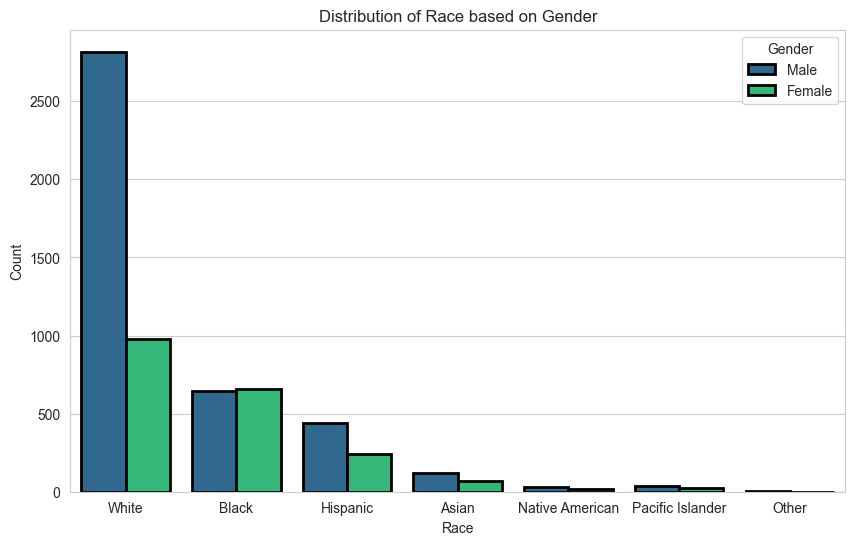

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DODRace', hue='Gender', saturation=1, edgecolor='k',
              linewidth=2, palette='viridis')
plt.title(f'Distribution of Race based on Gender')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

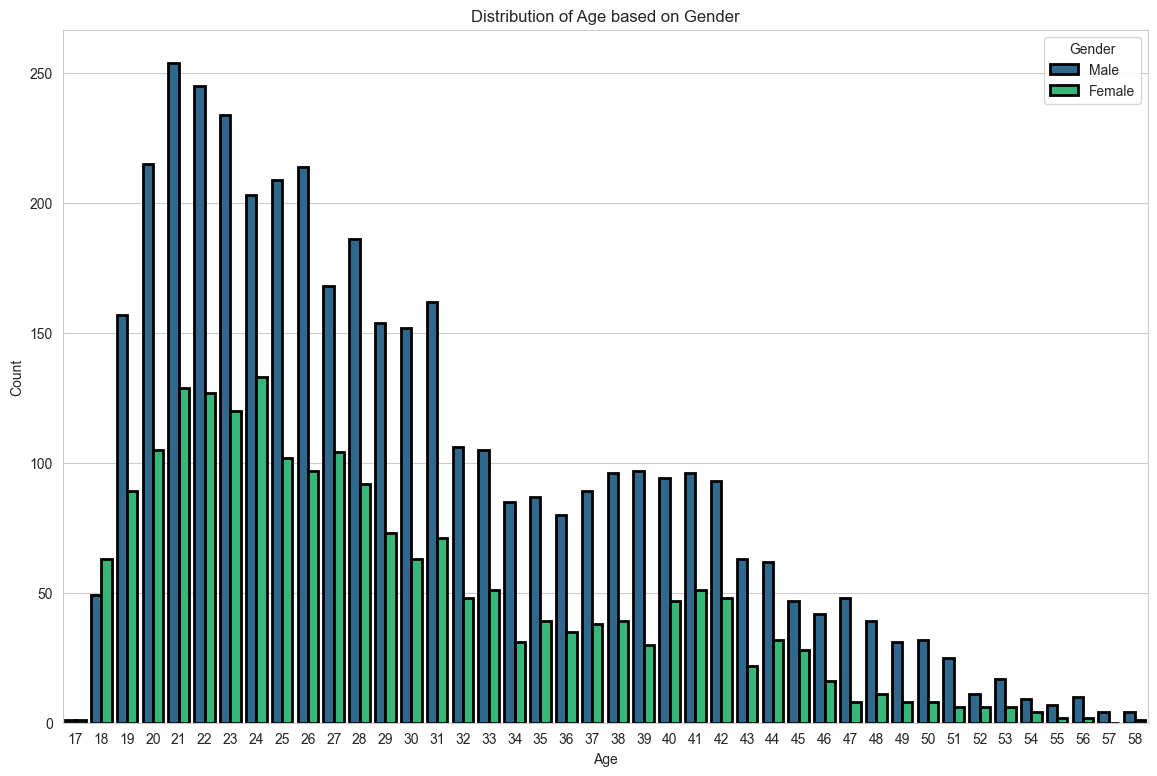

In [32]:
plt.figure(figsize=(14, 9))
sns.countplot(data=df, x='Age', hue='Gender', saturation=1, edgecolor='k',
              linewidth=2, palette='viridis')
plt.title(f'Distribution of Age based on Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

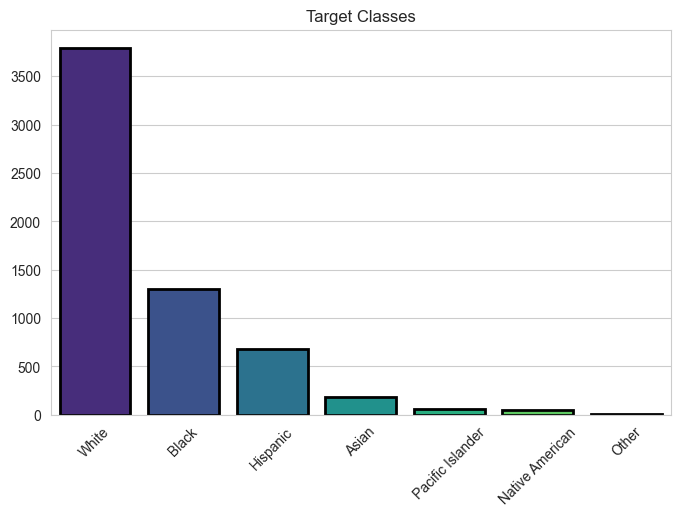

In [35]:
# visualizing our target distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values,
            saturation=1, edgecolor='k',
            linewidth=2, palette='viridis')
plt.xticks(rotation=45)
plt.title(f'Target Classes')
plt.show()

In [90]:
value_counts = df['DODRace'].value_counts()

# classes with count of 500 or more
race_classes = list(value_counts[value_counts >= 500].index)
race_classes

['White', 'Black', 'Hispanic']

In [91]:
# keep rows that has one of the 3 classes
df = df[df['DODRace'].isin(race_classes)]
df.shape

(5053, 100)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

### Data harmonization
must check for consistent units of Measurement

In [ ]:
mapping('NOTE')

In [38]:
subset = df.describe().T
subset = subset[['std', 'mean', 'max', 'min']]
subset

,std,mean,max,min
abdominalextensiondepthsitting,37.457748,247.254290,451.0,155.0
acromialheight,78.303123,1408.630265,1683.0,1146.0
acromionradialelength,20.444554,328.071590,393.0,249.0
anklecircumference,15.965783,225.201768,293.0,156.0
axillaheight,71.260913,1301.902583,1553.0,1062.0
balloffootcircumference,16.803556,244.408043,306.0,186.0
balloffootlength,13.379000,195.118911,245.0,151.0
biacromialbreadth,30.124094,399.706015,489.0,283.0
bicepscircumferenceflexed,41.270615,341.663027,490.0,216.0
bicristalbreadth,19.239580,274.903449,362.0,197.0


In [132]:
mapping('weightkg')

['Weight (in kg*10)']

In [139]:
#df['weightkg'] = df['weightkg'] / 10

### Column Transformer

In [162]:
cat_columns = list(df.select_dtypes(include=['object']).columns)
cat_columns.remove('DODRace')

In [163]:
cat_columns

['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference']

In [264]:
column_trans = make_column_transformer((
               OneHotEncoder( handle_unknown='ignore',
                              sparse_output=False), 
                              cat_columns),
                              remainder = 'passthrough', 
                              verbose_feature_names_out=False).set_output(transform="pandas")

### Data Splitting

In [95]:
# splitting X and y
X = df.drop(columns = ['DODRace'])
y = df['DODRace']

In [96]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=14)

In [97]:
X_train.shape

(4042, 99)

In [98]:
X_test.shape

(1011, 99)

In [31]:
# our scaller 
sc = MinMaxScaler()

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

### Evaluation metric

In [32]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

### Scorrer for Hispanic Class

In [33]:
f1_hespanic = make_scorer(f1_score, average = None, labels =['Hispanic'])
precision_hespanic = make_scorer(precision_score, average = None, labels =['Hispanic'])
recall_hespanic = make_scorer(recall_score, average = None, labels =['Hispanic'])


scoring = {"f1_hespanic":f1_hespanic, "precision_hespanic":precision_hespanic, "recall_hespanic":recall_hespanic}

## 1. Logistic model

### Vanilla Logistic Model

In [265]:
# Linear regression model
lr = LogisticRegression()

lr_pipe = make_pipeline(column_trans, sc, lr)

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [266]:
eval_metric(lr_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[ 830   13   62]
 [  20  233  185]
 [  21   44 2634]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93       905
    Hispanic       0.80      0.53      0.64       438
       White       0.91      0.98      0.94      2699

    accuracy                           0.91      4042
   macro avg       0.89      0.81      0.84      4042
weighted avg       0.91      0.91      0.91      4042


Test_Set
[[201   3  22]
 [  4  61  45]
 [  7  18 650]]
              precision    recall  f1-score   support

       Black       0.95      0.89      0.92       226
    Hispanic       0.74      0.55      0.64       110
       White       0.91      0.96      0.93       675

    accuracy                           0.90      1011
   macro avg       0.87      0.80      0.83      1011
weighted avg       0.90      0.90      0.90      1011



In [101]:
scores = cross_validate(lr_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hespanic            0.593450
train_f1_hespanic           0.636374
test_precision_hespanic     0.755057
train_precision_hespanic    0.803980
test_recall_hespanic        0.491279
train_recall_hespanic       0.526641
dtype: float64

### Logistic Model GridsearchCV

In [63]:
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Gender', 'Component', 'Branch',
                                     'WritingPreference'])])),
  ('minmaxscaler', MinMaxScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['Gender', 'Component', 'Branch',
                                   'WritingPreference'])]),
 'minmaxscaler': MinMaxScaler(),
 'logisticregression': LogisticRegression(),
 '

In [214]:
lr_param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1],
              'logisticregression__class_weight': ['balanced', {'White':1,'Hispanic':3.5,'Black':2}, 
              {'White':1,'Hispanic':4,'Black':2.5}, {'White':1,'Hispanic':4.5,'Black':3}],
              #'logisticregression__penalty': ['l2', None],
              # from docs : For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
              'logisticregression__solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
              }

Warning

The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:

- ‘lbfgs’ - [‘l2’, None]

- ‘liblinear’ - [‘l1’, ‘l2’]

- ‘newton-cg’ - [‘l2’, None]

- ‘newton-cholesky’ - [‘l2’, None]

- ‘sag’ - [‘l2’, None]

- ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]



In [215]:
lr_model_grid = GridSearchCV(lr_pipe,
                              lr_param_grid ,
                              scoring=f1_hespanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)
lr_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression...
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1],
                         'logisticregression__class_weight': ['balanced',
                                                              {'Black': 2,
                                                               'Hispanic': 3.5,
                                                               'White': 1},
                                                              {'Black': 2.5,
                                                               'Hispanic': 4,
                                                               'White': 1},
                                                              {'Black': 3,
                                                               'Hispanic': 4.5,
                                                               'White': 1}],
                         'logisticregression__solver': ['newton-cg', 'sag',
                                                        'saga', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']))

In [216]:
lr_model_grid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=1,
                                    class_weight={'Black': 2, 'Hispanic': 3.5,
                                                  'White': 1},
                                    solver='newton-cg'))])

In [108]:
eval_metric(lr_model_grid, X_train, y_train, X_test, y_test)

Train_Set
[[ 845   27   33]
 [  16  335   87]
 [  37  202 2460]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.94       905
    Hispanic       0.59      0.76      0.67       438
       White       0.95      0.91      0.93      2699

    accuracy                           0.90      4042
   macro avg       0.83      0.87      0.85      4042
weighted avg       0.91      0.90      0.90      4042


Test_Set
[[202   8  16]
 [  5  82  23]
 [ 16  68 591]]
              precision    recall  f1-score   support

       Black       0.91      0.89      0.90       226
    Hispanic       0.52      0.75      0.61       110
       White       0.94      0.88      0.91       675

    accuracy                           0.87      1011
   macro avg       0.79      0.84      0.81      1011
weighted avg       0.89      0.87      0.87      1011



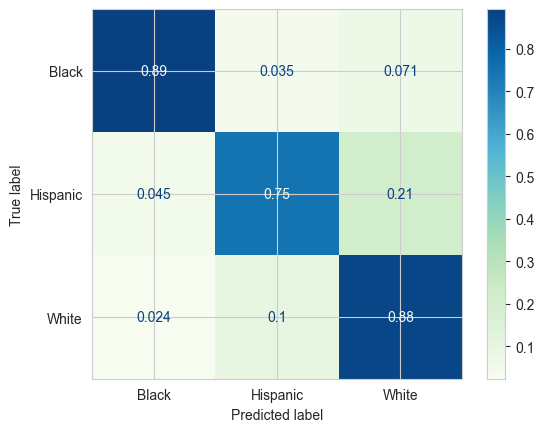

In [308]:
ConfusionMatrixDisplay.from_estimator(lr_model_grid,X_test, y_test,normalize='true', cmap='GnBu');

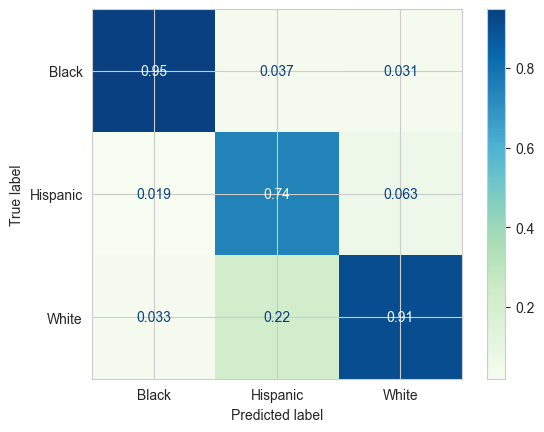

In [311]:
ConfusionMatrixDisplay.from_estimator(lr_pipe,X_test, y_test,normalize='pred', cmap='GnBu');

## 2. SVC

### Vanilla SVC model 

In [110]:
# SVM model
svm = SVC()

svm_pipe = make_pipeline(column_trans, sc, svm)

svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [111]:
eval_metric(svm_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[ 825    1   79]
 [  21  125  292]
 [   8    8 2683]]
              precision    recall  f1-score   support

       Black       0.97      0.91      0.94       905
    Hispanic       0.93      0.29      0.44       438
       White       0.88      0.99      0.93      2699

    accuracy                           0.90      4042
   macro avg       0.93      0.73      0.77      4042
weighted avg       0.90      0.90      0.88      4042


Test_Set
[[192   2  32]
 [  5  32  73]
 [  7   7 661]]
              precision    recall  f1-score   support

       Black       0.94      0.85      0.89       226
    Hispanic       0.78      0.29      0.42       110
       White       0.86      0.98      0.92       675

    accuracy                           0.88      1011
   macro avg       0.86      0.71      0.74      1011
weighted avg       0.87      0.88      0.86      1011



###  SVC Model GridsearchCV

In [44]:
svm_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Gender', 'Component', 'Branch',
                                     'WritingPreference'])])),
  ('minmaxscaler', MinMaxScaler()),
  ('svc', SVC())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['Gender', 'Component', 'Branch',
                                   'WritingPreference'])]),
 'minmaxscaler': MinMaxScaler(),
 'svc': SVC(),
 'columntransformer__n_jobs': None,
 'columntransformer__remai

In [116]:
svm_param_grid = {
    'svc__C': [0.01, 0.1, 1, 10],
    'svc__kernel': ['linear', 'poly', 'rbf'],
    'svc__degree': [2, 3, 4],
    'svc__class_weight': ['balanced']
}

In [117]:
svm_model_grid = GridSearchCV(svm_pipe,
                              svm_param_grid ,
                              scoring=f1_hespanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10],
                         'svc__class_weight': ['balanced'],
                         'svc__degree': [2, 3, 4],
                         'svc__kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']))

In [120]:
svm_model_grid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(C=10, class_weight='balanced', kernel='poly'))])

In [121]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Train_Set
[[ 904    1    0]
 [   0  436    2]
 [   6   75 2618]]
              precision    recall  f1-score   support

       Black       0.99      1.00      1.00       905
    Hispanic       0.85      1.00      0.92       438
       White       1.00      0.97      0.98      2699

    accuracy                           0.98      4042
   macro avg       0.95      0.99      0.97      4042
weighted avg       0.98      0.98      0.98      4042


Test_Set
[[201   6  19]
 [  8  67  35]
 [ 18  52 605]]
              precision    recall  f1-score   support

       Black       0.89      0.89      0.89       226
    Hispanic       0.54      0.61      0.57       110
       White       0.92      0.90      0.91       675

    accuracy                           0.86      1011
   macro avg       0.78      0.80      0.79      1011
weighted avg       0.87      0.86      0.87      1011



## 3. RF

### Vanilla RF Model

In [263]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value',
                         unknown_value=-1)


column_trans = make_column_transformer((ord_enc, cat_columns),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [127]:
# Vanilla RF
rf = RandomForestClassifier(random_state=101)

rf_pipe = make_pipeline(column_trans, sc, rf)

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=101))])

In [128]:
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[ 905    0    0]
 [   0  438    0]
 [   0    0 2699]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       905
    Hispanic       1.00      1.00      1.00       438
       White       1.00      1.00      1.00      2699

    accuracy                           1.00      4042
   macro avg       1.00      1.00      1.00      4042
weighted avg       1.00      1.00      1.00      4042


Test_Set
[[167   0  59]
 [ 11   5  94]
 [ 20   1 654]]
              precision    recall  f1-score   support

       Black       0.84      0.74      0.79       226
    Hispanic       0.83      0.05      0.09       110
       White       0.81      0.97      0.88       675

    accuracy                           0.82      1011
   macro avg       0.83      0.58      0.59      1011
weighted avg       0.82      0.82      0.77      1011



### RF Model GridsearchCV

In [129]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Gender', 'Component', 'Branch',
                                     'SubjectsBirthLocation',
                                     'WritingPreference'])],
                     verbose_feature_names_out=False)),
  ('minmaxscaler', MinMaxScaler()),
  ('randomforestclassifier', RandomForestClassifier(random_state=101))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  ['Gender', '

In [134]:
rf_param_grid = {
    'randomforestclassifier__class_weight':['balanced'],
    'randomforestclassifier__criterion':['gini','entropy','logg_loss'],
    'randomforestclassifier__max_depth':[2,3,4,5]
}

In [135]:
rf_model_grid = GridSearchCV(rf_pipe,
                              rf_param_grid ,
                              scoring=recall_hespanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)
rf_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__class_weight': ['balanced'],
                         'randomforestclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'logg_loss'],
                         'randomforestclassifier__max_depth': [2, 3, 4, 5]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [136]:
rf_model_grid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        random_state=101))])

In [137]:
eval_metric(rf_model_grid, X_train, y_train, X_test, y_test)

Train_Set
[[ 684  117  104]
 [  43  259  136]
 [ 208  915 1576]]
              precision    recall  f1-score   support

       Black       0.73      0.76      0.74       905
    Hispanic       0.20      0.59      0.30       438
       White       0.87      0.58      0.70      2699

    accuracy                           0.62      4042
   macro avg       0.60      0.64      0.58      4042
weighted avg       0.77      0.62      0.67      4042


Test_Set
[[159  34  33]
 [ 15  62  33]
 [ 61 211 403]]
              precision    recall  f1-score   support

       Black       0.68      0.70      0.69       226
    Hispanic       0.20      0.56      0.30       110
       White       0.86      0.60      0.70       675

    accuracy                           0.62      1011
   macro avg       0.58      0.62      0.56      1011
weighted avg       0.75      0.62      0.66      1011



## 4. XGBoost

### Vanilla XGBoost Model

In [141]:
# ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
y_train_encoded = y_train.map({'White':0, 'Black':1, 'Hispanic':2})
y_test_encoded = y_test.map({'White':0, 'Black':1, 'Hispanic':2})

In [143]:
# XGBoost 
xgb =  XGBClassifier(random_state=101)

# no need for scaler
xgb_pipe = make_pipeline(column_trans, xgb)

xgb_pipe.fit(X_train, y_train_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [145]:
eval_metric(xgb_pipe, X_train, y_train_encoded, X_test, y_test_encoded)

Train_Set
[[2699    0    0]
 [   0  905    0]
 [   0    0  438]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2699
           1       1.00      1.00      1.00       905
           2       1.00      1.00      1.00       438

    accuracy                           1.00      4042
   macro avg       1.00      1.00      1.00      4042
weighted avg       1.00      1.00      1.00      4042


Test_Set
[[650  15  10]
 [ 34 188   4]
 [ 59   6  45]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       675
           1       0.90      0.83      0.86       226
           2       0.76      0.41      0.53       110

    accuracy                           0.87      1011
   macro avg       0.85      0.73      0.77      1011
weighted avg       0.87      0.87      0.86      1011



### XGBoost Model GridsearchCV

In [146]:
xgb_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Gender', 'Component', 'Branch',
                                     'SubjectsBirthLocation',
                                     'WritingPreference'])],
                     verbose_feature_names_out=False)),
  ('xgbclassifier',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None

In [178]:
xgb_param_grid = {'xgbclassifier__n_estimators': [20,40,60,80],
                  'xgbclassifier__max_depth': [2, 3, 4, 5],
                  }

In [179]:
xgb_model_grid = GridSearchCV(xgb_pipe,
                             xgb_param_grid,
                             scoring=recall_hespanic,
                             cv=10,
                             n_jobs=-1,
                             return_train_score=True)
xgb_model_grid.fit(X_train, y_train_encoded)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('xgbclassifier',
                                        XGBClassifier...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob',
                                                      predictor=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__max_depth': [2, 3, 4, 5],
                         'xgbclassifier__n_estimators': [20, 40, 60, 80]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [180]:
xgb_model_grid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=20,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [181]:
eval_metric(xgb_model_grid, X_train, y_train_encoded, X_test, y_test_encoded)

Train_Set
[[2670   25    4]
 [ 202  703    0]
 [ 315   30   93]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2699
           1       0.93      0.78      0.85       905
           2       0.96      0.21      0.35       438

    accuracy                           0.86      4042
   macro avg       0.91      0.66      0.70      4042
weighted avg       0.87      0.86      0.83      4042


Test_Set
[[654  20   1]
 [ 66 160   0]
 [ 75   8  27]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       675
           1       0.85      0.71      0.77       226
           2       0.96      0.25      0.39       110

    accuracy                           0.83      1011
   macro avg       0.88      0.64      0.68      1011
weighted avg       0.84      0.83      0.81      1011



---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [197]:
oversampling = SMOTE( random_state = 101)
undersampling = RandomUnderSampler(sampling_strategy = 'not majority',random_state = 101)

## Logistic Regression Over/ Under Sampling

In [204]:
from imblearn.pipeline import Pipeline as impip

In [205]:
tuned_lr = LogisticRegression(C=1, class_weight={'Black': 2, 'Hispanic': 3.5, 'White': 1}, solver='newton-cg')

steps = [('transformer', column_trans), ('under', undersampling) ,('scaler', sc),
            ('Tuned logistic Regression', tuned_lr)]

pipe_oversampling = impip(steps=steps)

pipe_oversampling.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('under',
                 RandomUnderSampler(random_state=101,
                                    sampling_strategy='not majority')),
                ('scaler', MinMaxScaler()),
                ('Tuned logistic Regression',
                 LogisticRegression(C=1,
                                    class_weight={'Black': 2, 'Hispanic': 3.5,
                                                  'White': 1},
                                    solver='newton-cg'))])

In [206]:
eval_metric(pipe_oversampling, X_train, y_train, X_test, y_test)

Train_Set
[[ 786   57   62]
 [   9  340   89]
 [  17  204 2478]]
              precision    recall  f1-score   support

       Black       0.97      0.87      0.92       905
    Hispanic       0.57      0.78      0.65       438
       White       0.94      0.92      0.93      2699

    accuracy                           0.89      4042
   macro avg       0.83      0.85      0.83      4042
weighted avg       0.91      0.89      0.90      4042


Test_Set
[[187  15  24]
 [  2  85  23]
 [  7  71 597]]
              precision    recall  f1-score   support

       Black       0.95      0.83      0.89       226
    Hispanic       0.50      0.77      0.60       110
       White       0.93      0.88      0.91       675

    accuracy                           0.86      1011
   macro avg       0.79      0.83      0.80      1011
weighted avg       0.89      0.86      0.87      1011



In [209]:
scores = cross_validate(pipe_oversampling,
                        X_train,
                        y_train,
                        scoring='precision_macro',
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score     0.805110
train_score    0.826261
dtype: float64

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [213]:
# vanilla lr model
matthews_corrcoef(y_test, lr_pipe.predict(X_test))

0.7952243217519188

In [217]:
# tuned lr model
matthews_corrcoef(y_test, lr_model_grid.predict(X_test))

0.7439222632597261

In [222]:
matthews_corrcoef(y_test, pipe_oversampling.predict(X_test))

0.7470354848700977

In [220]:
cohen_kappa_score(y_test, lr_pipe.predict(X_test))

0.7920072982082815

In [221]:
cohen_kappa_score(y_test, lr_model_grid.predict(X_test))

0.7401288620337068

In [223]:
cohen_kappa_score(y_test, pipe_oversampling.predict(X_test))

0.7447199570941463

# SHAP Analysis

In [268]:
lr_pipe.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['Gender', 'Component', 'Branch',
                                   'SubjectsBirthLocation',
                                   'WritingPreference'])],
                   verbose_feature_names_out=False),
 'minmaxscaler': MinMaxScaler(),
 'logisticregression': LogisticRegression()}

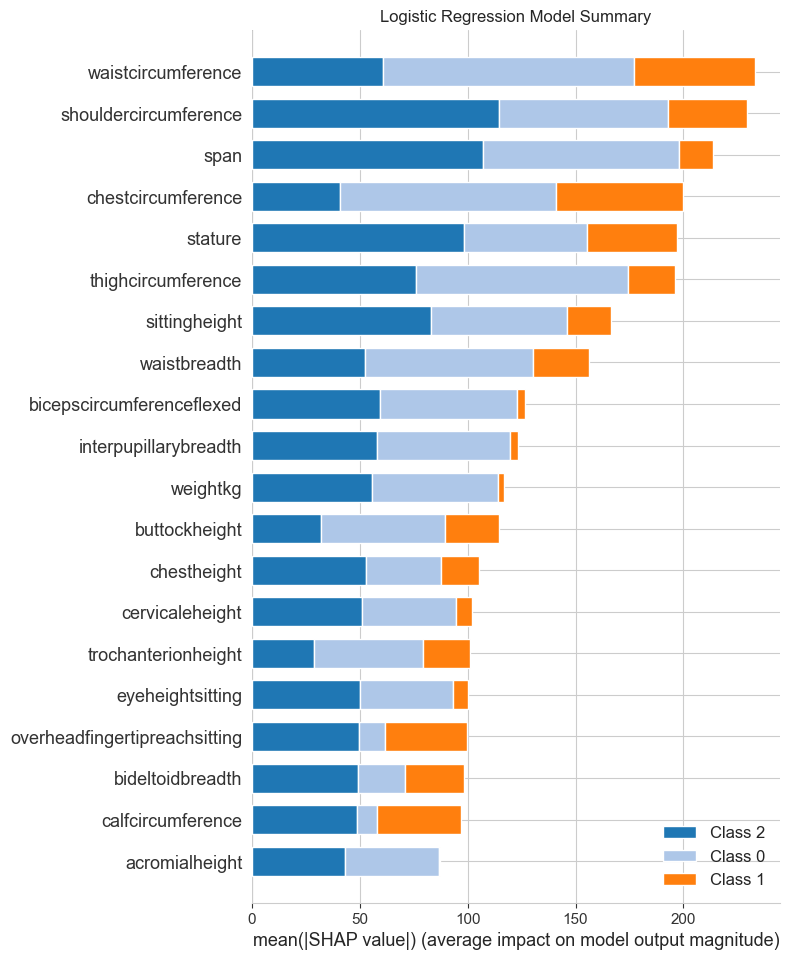

In [276]:
transformed_x = column_trans.fit_transform(X_train)

explainer = shap.Explainer(
    lr_pipe.named_steps.logisticregression, transformed_x)
shap_values = explainer.shap_values(transformed_x)

shap.summary_plot(shap_values, transformed_x, show=False,
                  color=plt.get_cmap('tab20'))
plt.title('Logistic Regression Model Summary')
plt.show()

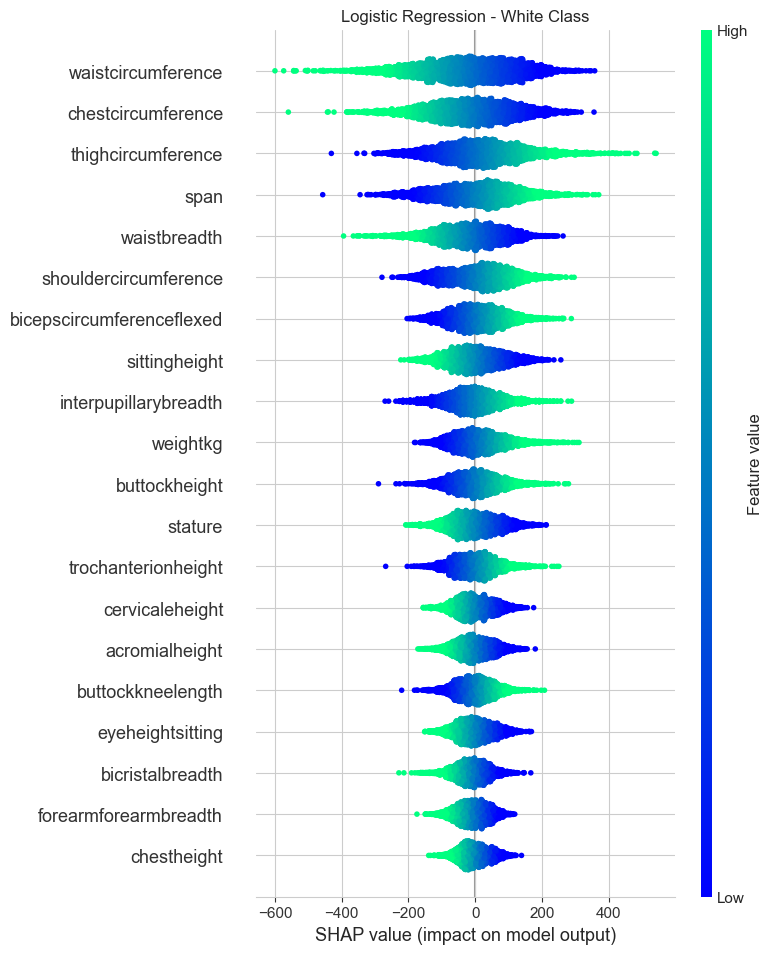

In [293]:
shap.summary_plot(shap_values[0], transformed_x, show=False, cmap=plt.get_cmap('winter'))
plt.title('Logistic Regression - Black Class')
plt.show()

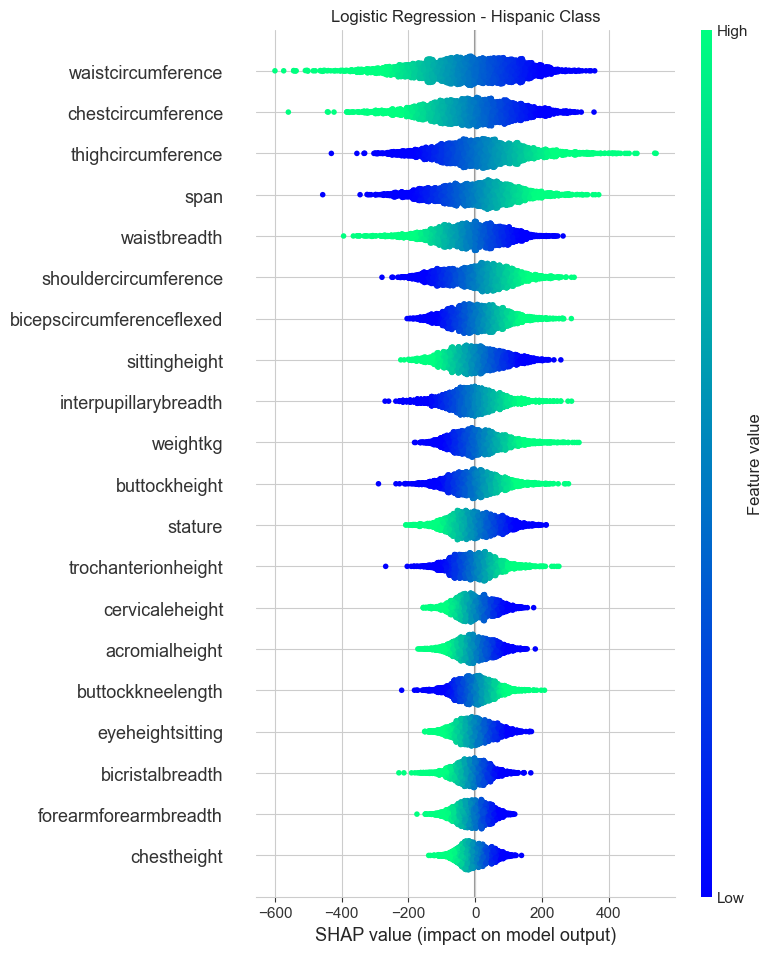

In [294]:
shap.summary_plot(shap_values[0], transformed_x, show=False, cmap=plt.get_cmap('winter'))
plt.title('Logistic Regression - Hispanic Class')
plt.show()

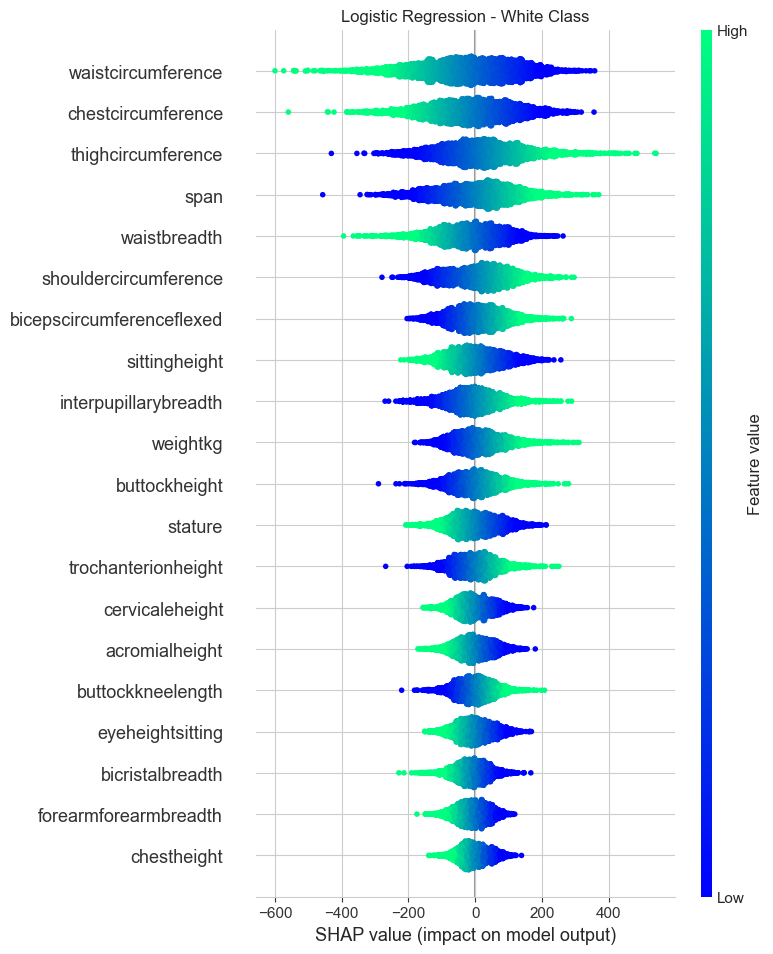

In [295]:
shap.summary_plot(shap_values[0], transformed_x, show=False, cmap=plt.get_cmap('winter'))
plt.title('Logistic Regression - White Class')
plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___